In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from lmfit import Model
import datetime

In [4]:
# load data
file_1 = 'D:/O2_Calibration_Images/RAW_2023-08-10/red_green_ratio_4.csv'
file_2 = 'D:/O2_Calibration_Images/RAW_2023-08-11/red_green_ratio_15.csv'
file_3 = 'D:/O2_Calibration_Images/RAW_2023-08-14/red_green_ratio_25.csv'
file_4 = 'D:/O2_Calibration_Images/RAW_2023-09-05/red_green_ratio.csv'


data_1 = pd.read_csv(file_1, decimal=',')
data_2 = pd.read_csv(file_2, decimal=',')
data_3 = pd.read_csv(file_3, decimal=',')
data_4 = pd.read_csv(file_4, decimal=',')
#print(data_1,data_2,data_3)

In [5]:
# Group the data by Air Saturation and calculate the mean ratio for each air saturation value
grouped_data_4 = data_1.groupby('Temperature/O2').mean().round(4)
# Group the data by Air Saturation and calculate the mean ratio for each air saturation value
grouped_data_15 = data_2.groupby('Temperature/O2').mean().round(4)
# Group the data by Air Saturation and calculate the mean ratio for each air saturation value
grouped_data_25 = data_3.groupby('Temperature/O2').mean().round(4)

grouped_data_22 = data_4.groupby('Temperature/O2').mean().round(4)

In [6]:
# Get the R0 value: Intensity Ratio at Air Saturation = 0%
R0_1 = data_1.iloc[0, 1]
R0_2 = data_2.iloc[0, 1]
R0_3 = data_3.iloc[0, 1]
R0_4 = data_4.iloc[0, 1]
print('This is R0', R0_1,R0_2,R0_3,R0_4)

This is R0 1.9533785116237457 1.926065746111692 1.8847606172553024 1.9378442669039684


In [7]:
# Normalize the data by R0/R
grouped_data_4['Intensity Ratio'] = R0_1 / grouped_data_4['Intensity Ratio']
grouped_data_15['Intensity Ratio'] = R0_1 / grouped_data_15['Intensity Ratio']  
grouped_data_25['Intensity Ratio'] = R0_1 / grouped_data_25['Intensity Ratio']   
grouped_data_22['Intensity Ratio'] = R0_1 / grouped_data_22['Intensity Ratio']   

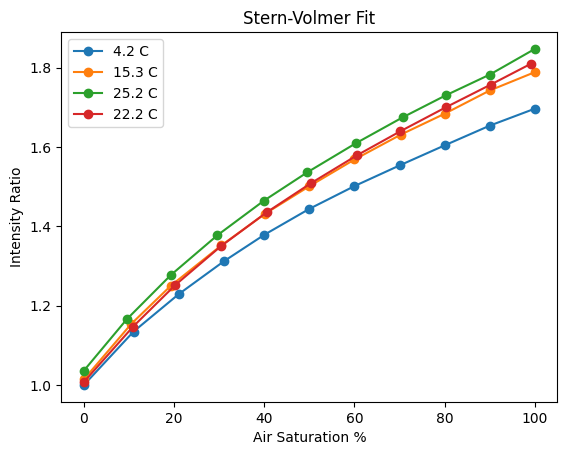

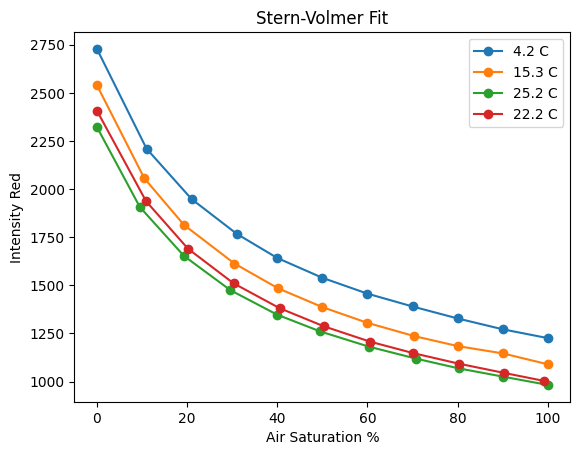

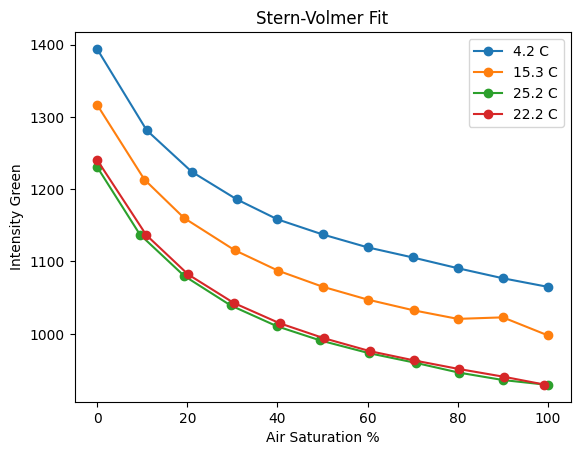

In [9]:
import matplotlib.pyplot as plt

# Create a plot
plt.plot(grouped_data_4.index, grouped_data_4['Intensity Ratio'], 'o-', label='4.2 C')
plt.plot(grouped_data_15.index, grouped_data_15['Intensity Ratio'], 'o-', label='15.3 C')
plt.plot(grouped_data_25.index, grouped_data_25['Intensity Ratio'], 'o-', label='25.2 C')
plt.plot(grouped_data_22.index, grouped_data_22['Intensity Ratio'], 'o-', label='22.2 C')

# Set the x-axis and y-axis labels
plt.title('Stern-Volmer Fit')
plt.xlabel('Air Saturation %')
plt.ylabel('Intensity Ratio')

# Show the legend
plt.legend()
plt.show()

plt.plot(grouped_data_4.index, grouped_data_4['Intensity Red'], 'o-', label='4.2 C')
plt.plot(grouped_data_15.index, grouped_data_15['Intensity Red'], 'o-', label='15.3 C')
plt.plot(grouped_data_25.index, grouped_data_25['Intensity Red'], 'o-', label='25.2 C')
plt.plot(grouped_data_22.index, grouped_data_22['Intensity Red'], 'o-', label='22.2 C')

# Set the x-axis and y-axis labels
plt.title('Stern-Volmer Fit')
plt.xlabel('Air Saturation %')
plt.ylabel('Intensity Red')

# Show the legend
plt.legend()
plt.show()

plt.plot(grouped_data_4.index, grouped_data_4['Intensity Green'], 'o-', label='4.2 C')
plt.plot(grouped_data_15.index, grouped_data_15['Intensity Green'], 'o-', label='15.3 C')
plt.plot(grouped_data_25.index, grouped_data_25['Intensity Green'], 'o-', label='25.2 C')
plt.plot(grouped_data_22.index, grouped_data_22['Intensity Green'], 'o-', label='22.2 C')

# Set the x-axis and y-axis labels
plt.title('Stern-Volmer Fit')
plt.xlabel('Air Saturation %')
plt.ylabel('Intensity Green')

# Show the legend
plt.legend()
plt.show()

In [41]:
# combine all red channels at different temperatures
df = pd.concat([grouped_data_1['Intensity Red'], grouped_data_2['Intensity Red'], grouped_data_3['Intensity Red']], axis=1).sort_index()
df.columns = [4.2, 15.3, 25.2]

# interpolate the data to align the vakues to given O2 concentration 
df_interpol = df.interpolate(method='index').T
df_interpol

Temperature/O2,0.0,9.5,10.5,11.0,19.3,21.0,29.6,30.5,31.0,39.9,...,50.0,60.0,60.3,70.0,70.3,70.7,80.0,80.2,90.0,100.0
4.2,2727.8928,2280.413955,2233.310918,2209.759400,1992.406719,1947.888700,1792.848674,1776.623555,1767.609600,1643.445601,...,1539.165700,1456.867700,1454.868695,1390.234200,1388.368518,1385.880942,1328.044800,1326.919980,1271.8038,1226.0125
15.3,2539.1911,2102.070405,2056.057700,2042.300706,1813.934600,1783.464559,1629.321998,1613.190800,1606.544599,1488.242221,...,1386.973100,1305.186100,1303.197109,1238.886391,1236.897400,1234.741953,1184.627800,1183.869462,1146.7109,1090.1104
25.2,2322.1116,1907.269400,1881.306257,1868.324686,1652.830600,1623.455062,1474.849400,1463.805116,1457.669402,1348.453700,...,1257.196606,1183.942717,1181.745100,1124.021986,1122.236735,1119.856400,1070.050103,1068.979000,1026.1668,982.9468


In [50]:
X = np.array(df_interpol.index)

dic_para = dict()
for ox in df_interpol.columns:
    # set up the linear regression model and fit the data to the model
    reg = LinearRegression().fit(X.reshape(-1, 1), df_interpol[ox].values)
    # extract the relevant parameters (slope and interception)
    dic_para[ox] = (reg.coef_[0], reg.intercept_)

df_para = pd.DataFrame.from_dict(dic_para).T
df_para.columns = ['slope', 'interception']
df_para

,slope,interception
0.0,-19.276194,2816.947122
9.5,-17.734558,2360.829501
10.5,-16.746169,2306.409540
11.0,-16.235214,2282.032945
19.3,-16.168446,2060.633825
21.0,-15.436424,2014.938817
29.6,-15.134562,1857.844996
30.5,-14.892648,1839.773606
31.0,-14.754055,1830.443282
39.9,-14.045927,1702.664820


In [12]:
import pandas as pd

# Creating a DataFrame from a dictionary
data = {'Temp': ['4.1', '15.3', '25.2', '22.3'],
        'f': [0.60571155, 0.63528085, 0.64462573, 0.66081665],
        'k': [0.02071655, 0.02113593, 0.02073065, 0.02019263]}

df = pd.DataFrame(data)

# Display the DataFrame
df


,Temp,f,k
0,4.1,0.605712,0.020717
1,15.3,0.635281,0.021136
2,25.2,0.644626,0.020731
3,22.3,0.660817,0.020193


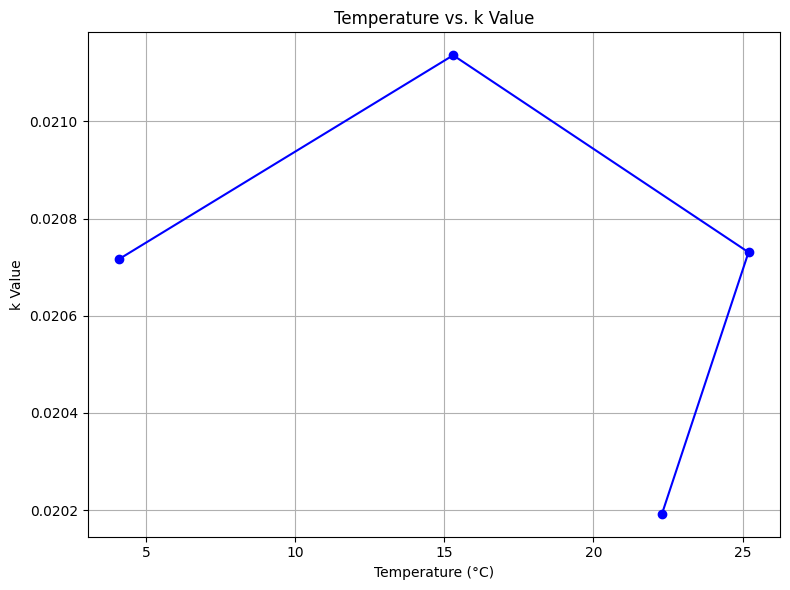

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
data = {'Temp': ['4.1', '15.3', '25.2', '22.3'],
        'f': [0.60571155, 0.63528085, 0.64462573, 0.66081665],
        'k': [0.02071655, 0.02113593, 0.02073065, 0.02019263]}

df = pd.DataFrame(data)

# Convert 'Temp' column to numeric
df['Temp'] = pd.to_numeric(df['Temp'])

# Plotting the data
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Create a line plot of 'Temp' against 'f'
plt.plot(df['Temp'], df['k'], marker='o', linestyle='-', color='b')
plt.xlabel('Temperature (°C)')
plt.ylabel('k Value')
plt.title('Temperature vs. k Value')

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.tight_layout()  # Adjust the layout (optional)
plt.show()
